In [ ]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,2.0,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2514,25.0,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
df.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7846804,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7846805,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.0,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7846806,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,2532,25.0,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7846807,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,1234,12.0,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7846808,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,2411,24.0,40.0,2.0,26,1160740.0,1946176.0,2023,07/15/2023 04:45:57 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"


In [ ]:
df.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

What crimes are most prevalent in Chicago?


In [ ]:
df['Primary Type'].isnull().values.any()


False

In [ ]:
df['Primary Type'].value_counts()


THEFT                                1655523
BATTERY                              1433696
CRIMINAL DAMAGE                       894469
NARCOTICS                             748757
ASSAULT                               512777
OTHER OFFENSE                         487246
BURGLARY                              426115
MOTOR VEHICLE THEFT                   382245
DECEPTIVE PRACTICE                    349195
ROBBERY                               294608
CRIMINAL TRESPASS                     215363
WEAPONS VIOLATION                     108629
PROSTITUTION                           69878
OFFENSE INVOLVING CHILDREN             56224
PUBLIC PEACE VIOLATION                 52544
SEX OFFENSE                            31028
CRIM SEXUAL ASSAULT                    27606
INTERFERENCE WITH PUBLIC OFFICER       18515
LIQUOR LAW VIOLATION                   14953
GAMBLING                               14621
ARSON                                  13384
HOMICIDE                               12726
KIDNAPPING

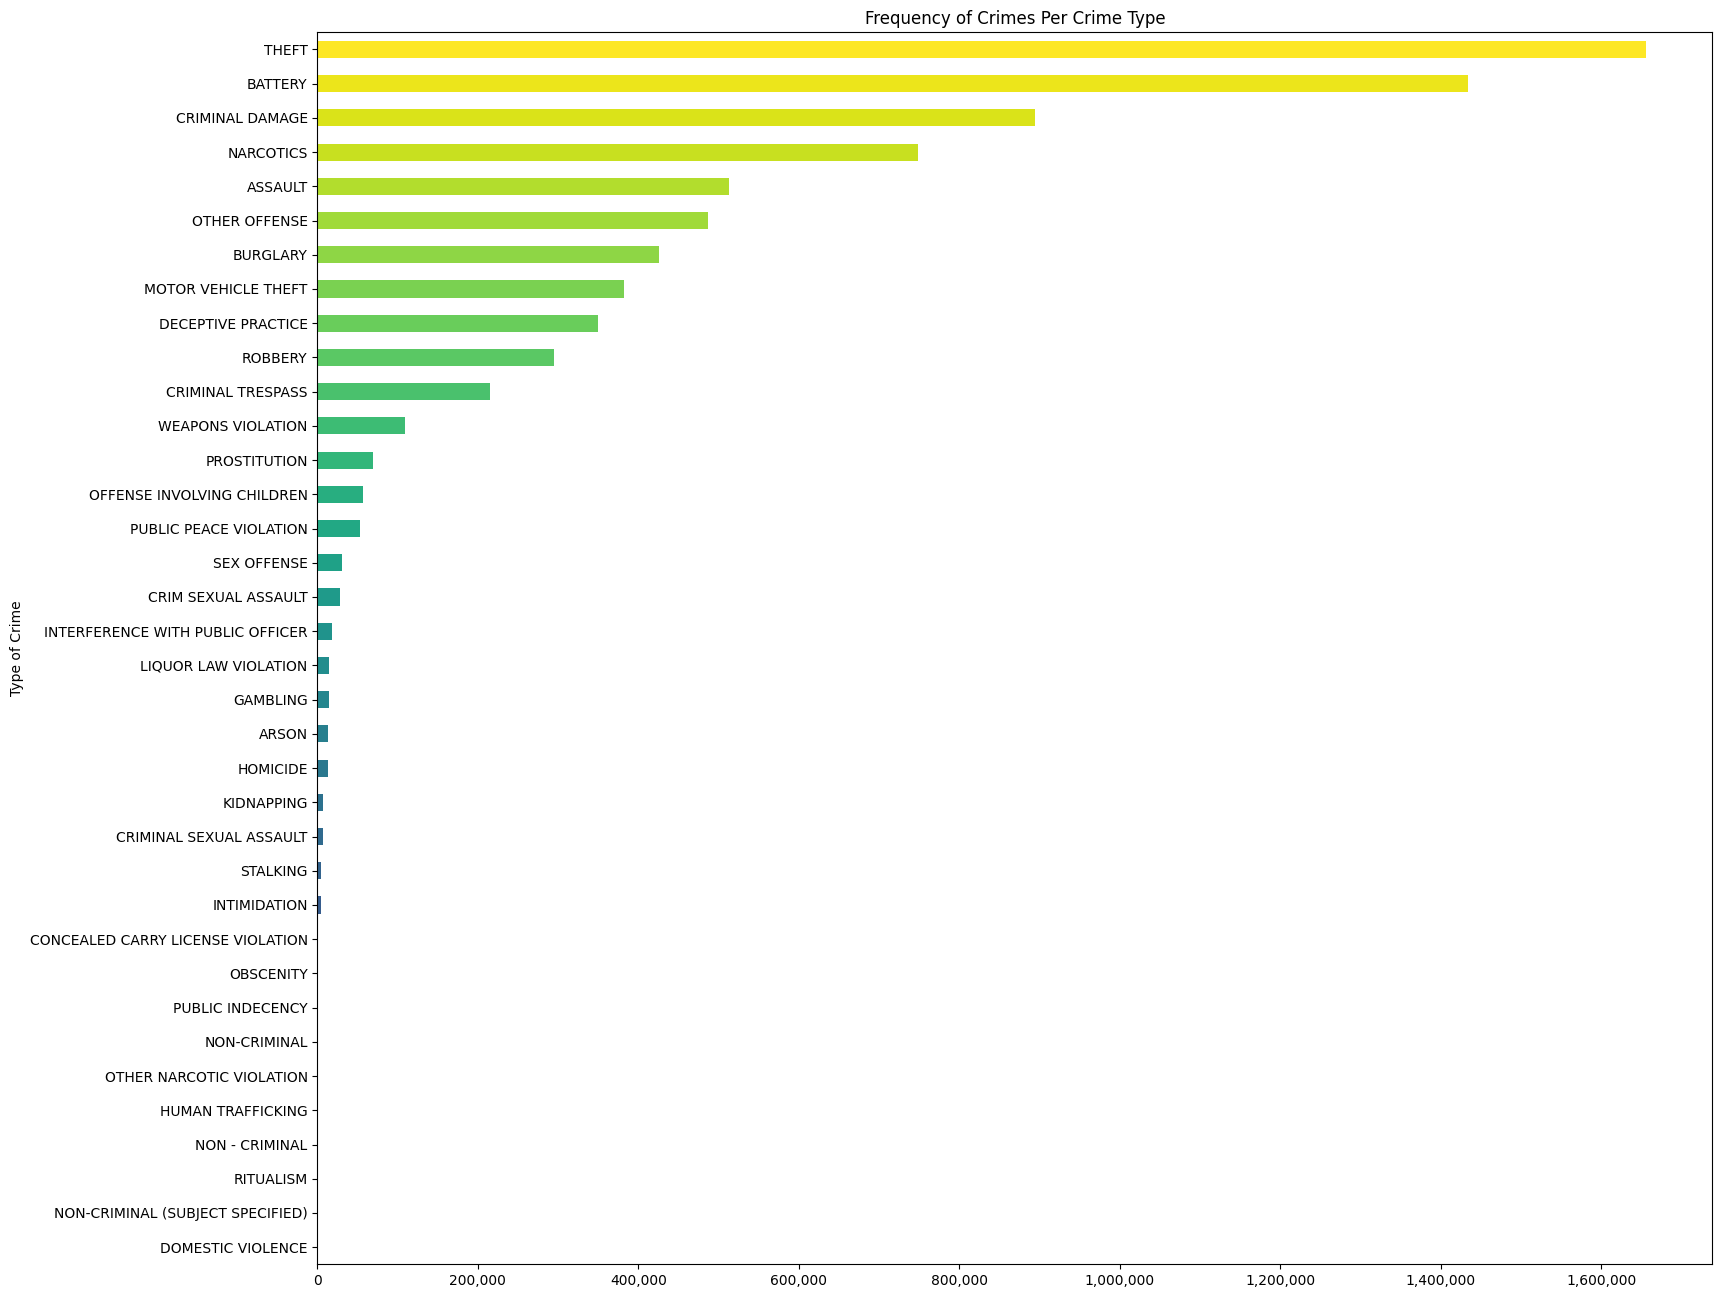

In [ ]:
import matplotlib.pyplot as plt

crime_type_df = df['Primary Type'].value_counts(ascending=True)

fig = plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")

colors = plt.cm.viridis(np.linspace(0, 1, len(crime_type_df)))

ax = crime_type_df.plot(kind='barh', color=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


What year had the most crime?


In [ ]:
df['Year'].isnull().values.any()


False

In [ ]:
df['Year'].value_counts()


2002    486805
2001    485885
2003    475983
2004    469421
2005    453772
2006    448178
2007    437087
2008    427169
2009    392825
2010    370505
2011    351975
2012    336273
2013    307478
2014    275745
2016    269808
2017    269092
2018    268811
2015    264775
2019    261290
2022    238712
2020    212170
2021    208733
2023    134317
Name: Year, dtype: int64

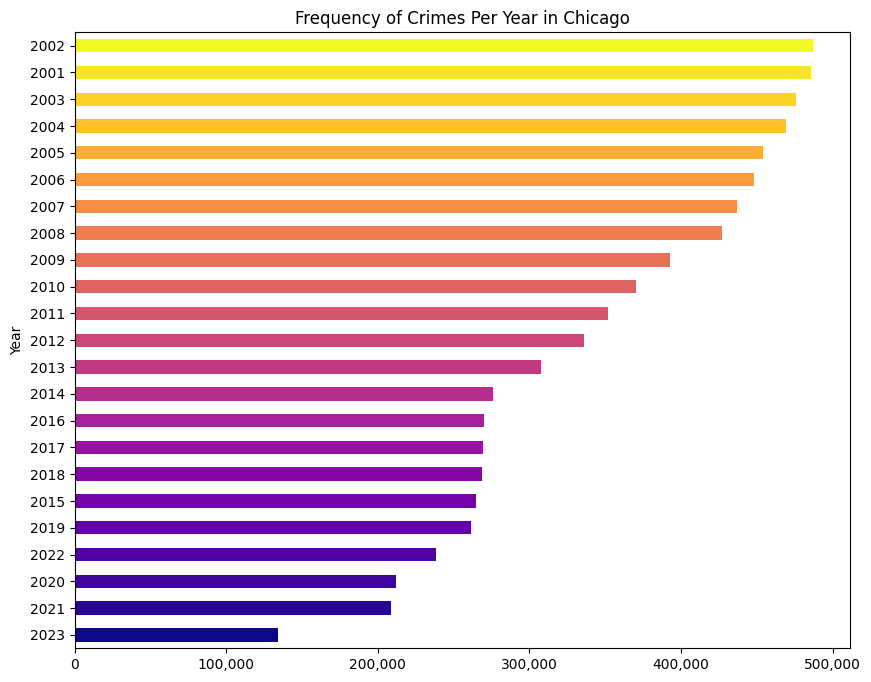

In [ ]:

crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig = plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")

# Define colors for the bars
colors = plt.cm.plasma(np.linspace(0, 1, len(crime_year_df)))

# Create the bar plot with colors
ax = crime_year_df.plot(kind='barh', color=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


What percentage of arrests were successful?


In [ ]:
df['Arrest'].isnull().values.any()


False

In [ ]:
df['Arrest'].value_counts()

False    5804567
True     2042242
Name: Arrest, dtype: int64

In [ ]:

arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100


arrest_percent.rename("% of Arrests",inplace=True)

arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

<Axes: ylabel='% of Arrests'>

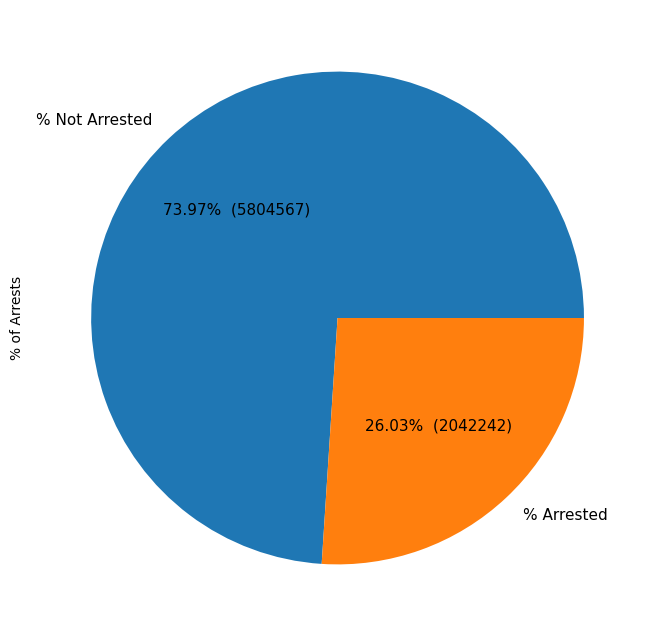

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))


What are the successful arrest percentages per year?


In [ ]:
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343951,70.788561
2001,True,141934,29.211439
2002,False,345242,70.919978
2002,True,141563,29.080022
2003,False,334395,70.253559
2003,True,141588,29.746441
2004,False,324721,69.174792
2004,True,144700,30.825208
2005,False,312848,68.943875


<Axes: title={'center': 'Percentages of successful arrests from 2001 to 2023'}, xlabel='Year', ylabel='Successful Arrest Percentage'>

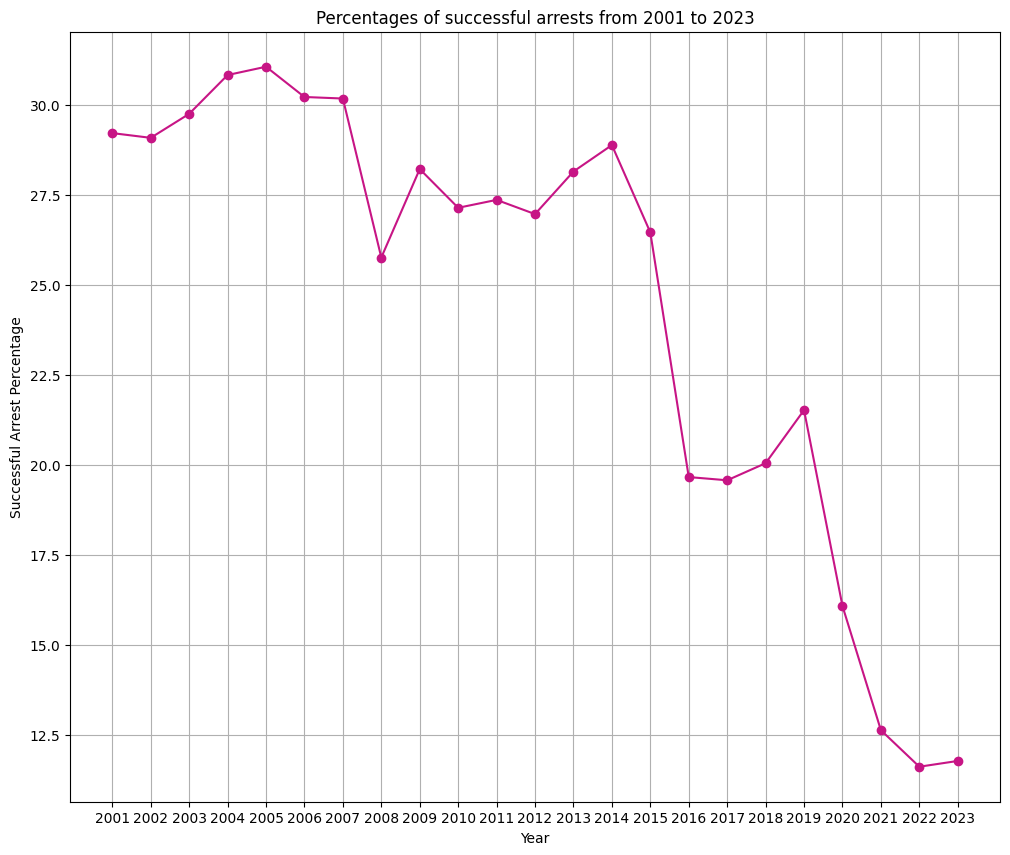

In [ ]:
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2023')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')

Data visualization for crimes commited since this month started


In [ ]:
import datetime

cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2018, 2, 28)]
print("Number of crimes in Chicago since start of March 2023: %d" % len(cleaned_df))

Number of crimes in Chicago since start of March 2023: 1263949


In [ ]:
crimes_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(crimes_map)

In [ ]:
for row in cleaned_df.values[:750]:
    popup = "<p> Crime ID: " + str(row[0]) +  "<br> Date and Time: " + row[2] + "<br> Crime Type: " + row[5] + "<br> Crime Description: " + row[6] + "<br> Address: " + row[3] + "</p>"
    folium.Marker([row[19], row[20]], popup=popup).add_to(marker_cluster)
#crimes_map.save('March-2018-chicago-crimes.html')
crimes_map

In [ ]:
crimes_heatmap = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
crimes_heatmap.add_child(plugins.HeatMap([[row[20], row[21]] for row in cleaned_df.itertuples()]))
crimes_heatmap.save("March-2018-chicago-crime-heatmap.html")
crimes_heatmap

Data visualization for crimes based on district from 2001 to present


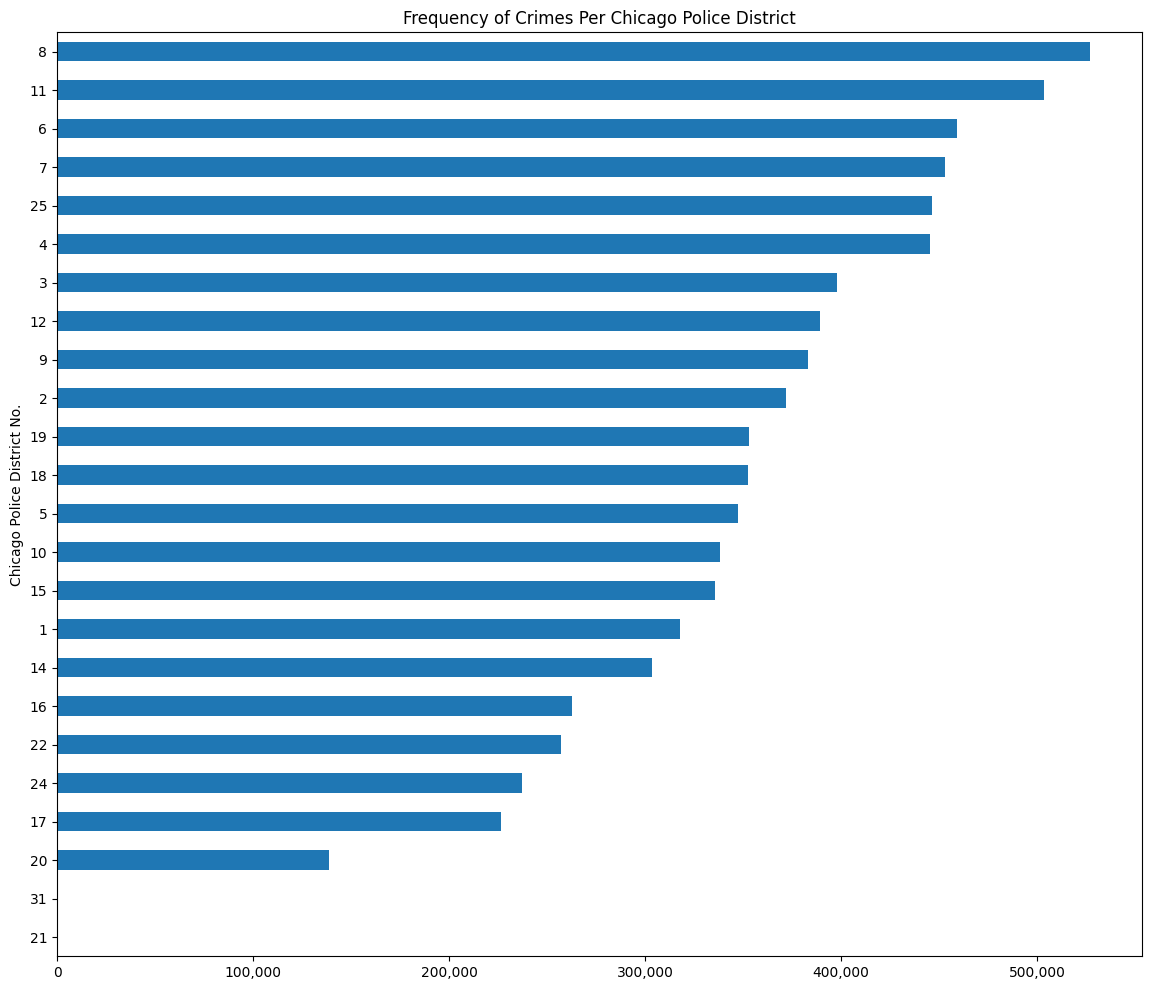

In [ ]:
district_crime = df['District'].value_counts(ascending=True)
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), i

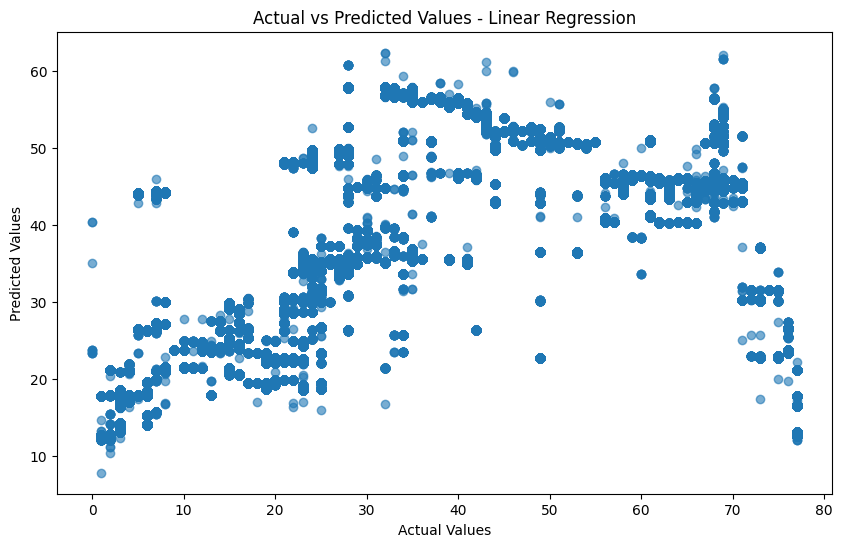


Cross-Validation Root Mean Squared Error: 17.695634606366806


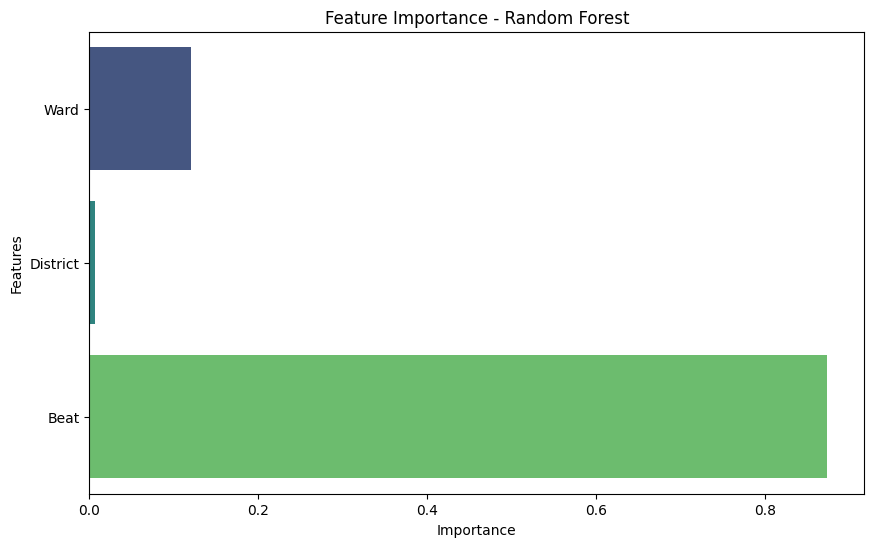

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


crime_data = pd.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.csv')
print("Dataset summary:")
print(crime_data.info())
print("Descriptive statistics:")
print(crime_data.describe())

crime_data.dropna(inplace=True)

X = crime_data[['Ward', 'District', 'Beat']]
y = crime_data['Community Area']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print('\nLinear Regression Model Evaluation:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Values - Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

cv_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
average_rmse_cv = np.sqrt(-np.mean(cv_scores))
print(f'\nCross-Validation Root Mean Squared Error: {average_rmse_cv}')

random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_scaled, y)

feature_importance = random_forest_model.feature_importances_
feature_names = list(X.columns)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, orient='h', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
